<a href="https://colab.research.google.com/github/harnalashok/Clustering/blob/master/gmm_generateFaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
# Last amended: 25th April, 2021
# My folder:
# Ref: Page 248, Aurelien
# Also see: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py
#           https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
#
# Objectives:
#           i)  Using GMM as a generative model
#           ii) Generate faces 
#          iii) Understanding GMM as a generative model

# https://www.kaggle.com/c/Kannada-MNIST/data?select=train.csv
#
"""

### Generating faces
How gmm acts as a generative model?

A face can be assumed to be nothing but a bundle of many Gaussian clusters oriented as per prominent facial features (see below images):

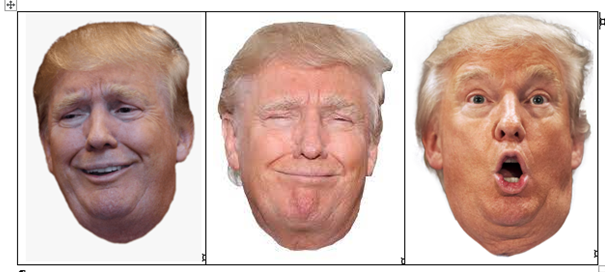



Of course, face is a mixture of not two or three but many gaussian components. So, train a GMM on faces with sufficient number of components--the more the better. For example, in a dense region (low variance) there will be large number of points producing a 'darker colour' region while in a sparse region (high variance) less density of points would give an effect to a lighter colour (shade).   

And also during learning process, allow a large number of iterations. Once distributions have been learnt, then those distributions can be used to generate points-- See below three clusters learnt on a face.    

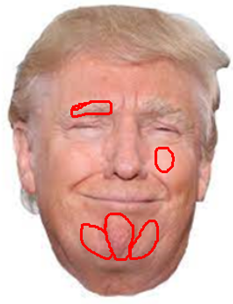

### Call libraries

In [ ]:
# 1.0 Call libraries
from sklearn.datasets import fetch_olivetti_faces
# 1.1 Import GaussianMixture class
from sklearn.mixture import GaussianMixture
# 1.2 Data manipulation
import pandas as pd
import numpy as np
# 1.3 Plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
# 1.4
import scipy.io 
import time, os

In [ ]:
# 1.5 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Get Olivetti faces
<font size = 1> 400 images; (64 X 64) pixels</font>

Here is a sample of olivetti faces. It is composed of 40 people, a total of 400 faces;
There are 10 face pictures for each person, including front face, side face and different expressions:    


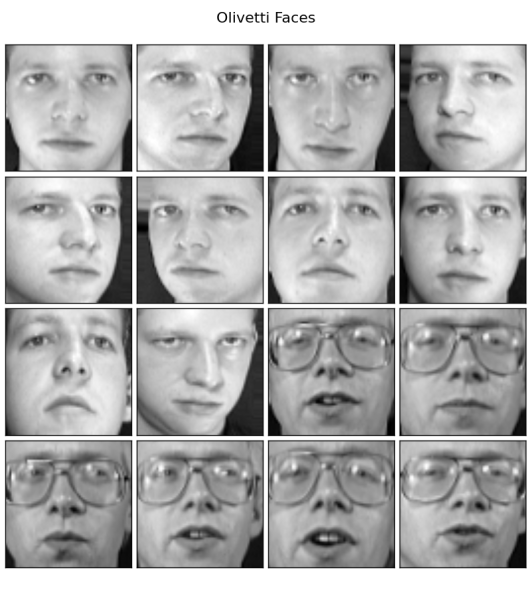

In [ ]:
# 2.0 Get olivetti faces
# Data is downloaded to:
#    /home/ashok/scikit_learn_data
#    /root/scikit_learn_data

_=faces,_ = fetch_olivetti_faces(
                                 return_X_y=True,
                                 shuffle=True
                                 )
# 2.1
faces.shape    # (400, 4096) 400 faces


# 2.2 Look at just one face:

_=imshow(faces[0, :].reshape(64,64))

In [ ]:
# 3.0 You can also get the faces from a dataset
#     in matlab format.
#     Download it from here:
#     https://cs.nyu.edu/~roweis/data/olivettifaces.mat
#     # https://stackoverflow.com/a/874488/3282777
#     And read it as below:
#
#path = "/content"
#os.chdir(path)
#olivetti = scipy.io.loadmat('olivettifaces.mat')
#olivetti = olivetti['faces'].T
#olivetti.shape
#imshow(olivetti[0].reshape(64,64));

### Gaussian Mixture Modeling (gmm)

A Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset.

#### Instantiate model

In [ ]:
# 4.0
gm_faces = GaussianMixture(
                           n_components = 3,   # More the components, better it will be
                                               # but would take more time
                           n_init = 10,
                           max_iter = 100, # The number of EM iterations to perform.
                           verbose = 1,
                           verbose_interval = 5 # No of iter done before next print.
                         )



In [ ]:
# 4.1   Train the model of the dataset:

start = time.time()
gm_faces.fit(faces)
end = time.time()
(end - start)/60     # 6 minutes

In [ ]:
# 4.2 Did algorithm(s) converge?
gm_faces.converged_     # True

In [ ]:
# 4.3 How many iterations were performed?

gm_faces.n_iter_      #  2

In [ ]:
# 4.4 Predict which 'faces' fall in which clusters:

gm_faces.predict(faces)

### Generate faces

In [ ]:
# 5.0 Generate 20 new faces
#     Takes time

start = time.time()
gen_faces = gm_faces.sample(n_samples = 20)
end = time.time()
(end- start)/60     # 8 minutes


In [ ]:
# 5.1 What do we get
len(gen_faces)       # 2; tuple with 2-objects
gen_faces[0].shape   # (20, 4096)


2

(20, 4096)

In [ ]:
# 5.2 Plot all 20 faces
im = gen_faces[0]
im.shape    # (20, 4096)

(20, 4096)

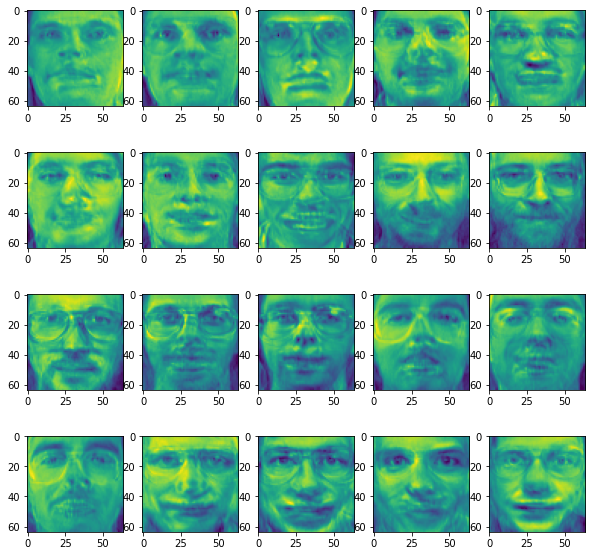

In [ ]:
# 5.3
fig = plt.figure(figsize = (10,10))

# 5.3.1
for i in range(20):
    _=plt.subplot(4,5,i+1)
    _=plt.imshow(im[i].reshape(64,64))

### GMM as Density Estimation 
<font size = 2>Reference [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html)</font>

Though GMM is often categorized as a clustering algorithm, fundamentally it is an algorithm for density estimation. That is to say, the result of a GMM fit to some data is technically not a clustering model, but a  probabilistic model describing the distribution of the data in its various distinctive regions. Consider the following figure with two clusters: 

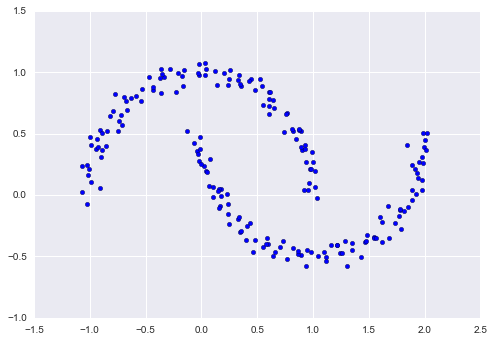

IF we model the above using two-component gmm, the results are not very happy. Note how wide (or uncertain) the two gaussians are!

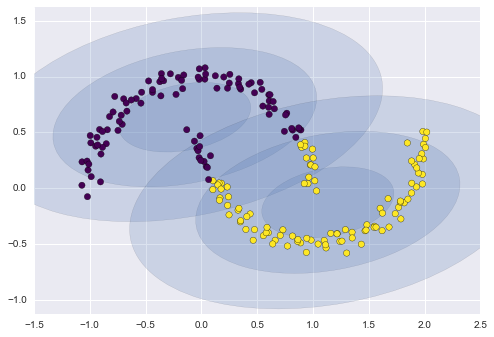

If we attempt to generate points, the points may be generated (with higher probability), anywhere within the marked regions (red/green) as shown in the figure below.

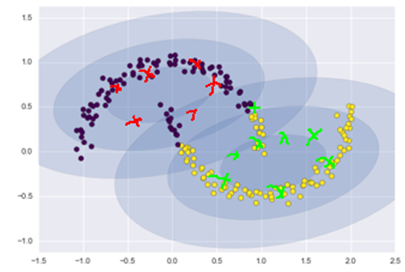

But if we increase the number of components, the fit is very close.

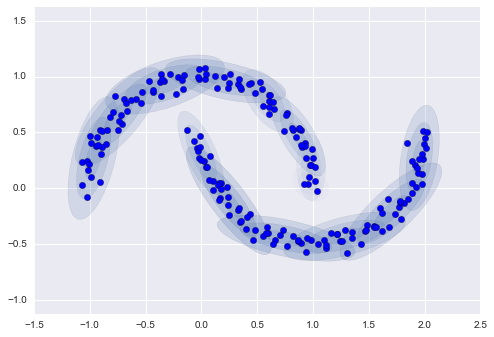

Here the mixture of 16 Gaussian distributions serve not to find separated clusters of data, but rather to help generate data (and hence model it) in the sixteen regions. This is a generative model of the distribution, meaning that the GMM gives us the recipe to generate new random data in those sixteen regions and to model the input. 

For example, here are **400 new points** drawn from this 16-component GMM fit to our original data:

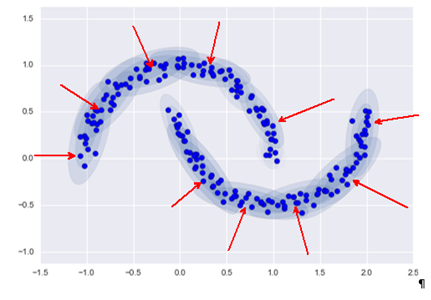

GMM is convenient as a flexible means of modeling an arbitrary multi-dimensional distribution of data.

### How many components for density estimation
Calculate aic and bic

The fact that GMM is a generative model gives us a natural means of determining the optimal number of components for a given dataset. A generative model is inherently a probability distribution for the dataset, and so we can simply evaluate the likelihood of the data under the model, using cross-validation to avoid over-fitting. Another means of correcting for over-fitting is to adjust the model likelihoods using some analytic criterion such as the Akaike information criterion (AIC) or the Bayesian information criterion (BIC). Scikit-Learn's GMM estimator actually includes built-in methods that compute both of these, and so it is very easy to operate on this approach.

In [ ]:
############## I am done #############